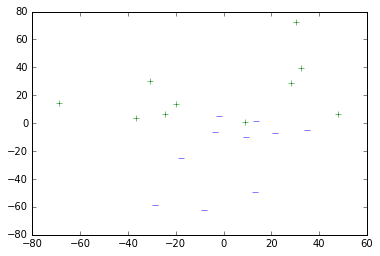

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
urban_list = list()
beach_r_list = list()

for i in range(10):
    img = mpimg.imread('../data/beach_r' + str(i) + '.jpg')
    beach_r_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

    img = mpimg.imread('../data/urban' + str(i) + '.jpg')
    urban_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

average = np.mean(urban_list + beach_r_list, axis=0)
urban_array_centered = np.array(urban_list)-average   
beach_r_array_centered = np.array(beach_r_list)-average  
plt.plot(beach_r_array_centered[:,0], beach_r_array_centered[:,1], 'g+')
plt.plot(urban_array_centered[:,0], urban_array_centered[:,1], 'b_')



In [2]:
from IPython import display
import time 

def plot_seperating_hyperlane(w):
    print w
    w = w / np.linalg.norm(w)
    t = np.arange(-60.0, 80.0, 10.0)
    plt.plot(w[1]*t, -w[0]*t, 'k--', lw=2)
    plt.plot(beach_r_array_centered[:,0], beach_r_array_centered[:,1], 'g+')
    plt.plot(urban_array_centered[:,0], urban_array_centered[:,1], 'b_')
    plt.show()
    

In [3]:
x = np.row_stack((urban_array_centered, beach_r_array_centered))
x

array([[ -8.07066127, -62.17923231],
       [  9.57897025, -10.11615489],
       [ 21.5526573 ,  -7.02326243],
       [ 34.90629732,  -4.53920233],
       [ 13.06751017, -49.55440928],
       [-28.62273046, -58.45198011],
       [ -2.04532629,   5.43604489],
       [-17.79339538, -24.75185693],
       [ 13.40405881,   1.46022557],
       [ -3.51962259,  -6.56106391],
       [ 30.33434454,  72.86523812],
       [  8.8414532 ,   0.53770223],
       [-30.61520328,  30.00340465],
       [-19.82686191,  13.44959114],
       [-24.60917754,   6.63899301],
       [-36.5841297 ,   3.7618837 ],
       [ 48.0243708 ,   6.30903326],
       [ 28.30330816,  28.82610903],
       [ 32.37461479,  39.54460672],
       [-68.70047691,  14.34432989]])

In [4]:
y = np.array([-1]*10 + [1]*10)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [5]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(x,y)

w = classifier.coef_[0]
w / np.linalg.norm(w)



array([-0.03015084,  0.99954536])

[-0.00576887  0.19124677]


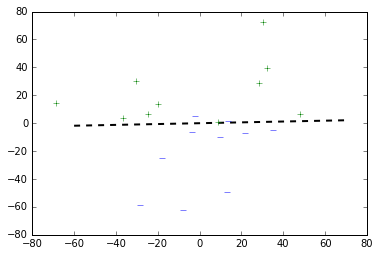

In [6]:
plot_seperating_hyperlane(w)



# learning with kernels

if the points that are labeled with $y=-1$ satify $x_1^2 + x_2^2 \le 1$ we can use the feature map $\phi(x_1,x_2) = (x_1^2,x_2^2,1)$ and learn $w = (1,1,-1)$.  

if the points that are labeled with $y=-1$ satify $x_1^2 - x_2^2 \le 0$ we can use the feature map $\phi(x_1,x_2) = (x_1^2,x_2)$ and learn $w = (1,-1)$. 
  
Talk about general quadratic kernel with the feature map $\phi(x_1,x_2) = (x_1^2, x_2^2, x_1x_2, x_1, x_2, 1)$

In [38]:
from sklearn import svm

classifier = svm.SVC(kernel='poly',degree=3,coef0=1)
classifier.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=14, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

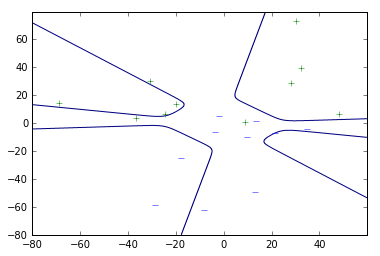

In [39]:
import numpy as np
xx, yy = np.meshgrid(np.arange(-80, 60, 0.1), np.arange(-80, 80, 0.1))

predictions = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)
plt.clf()
plt.plot(beach_r_array_centered[:,0], beach_r_array_centered[:,1], 'g+')
plt.plot(urban_array_centered[:,0], urban_array_centered[:,1], 'b_')
plt.contour(xx, yy, predictions,levels=[0])


In [ ]:
from sklearn import svm
import numpy as np


classifier = svm.SVC(kernel='rbf',gamma=1.0)
classifier.fit(x,y)

xx, yy = np.meshgrid(np.arange(-80, 60, 0.1), np.arange(-80, 80, 0.1))

predictions = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)
plt.clf()
plt.plot(beach_r_array_centered[:,0], beach_r_array_centered[:,1], 'g+')
plt.plot(urban_array_centered[:,0], urban_array_centered[:,1], 'b_')
plt.contour(xx, yy, predictions,levels=[0])

